<a href="https://colab.research.google.com/github/joshi98kishan/CrowdAi-Leaf-Disease-Detection-Fastai/blob/update-comment/Leaf_Disease_Recognition.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
# Connecting with Google Drive
from google.colab import drive
drive.mount('/content/gdrive', force_remount = False)

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [0]:
!curl -s https://course.fast.ai/setup/colab | bash

Updating fastai...
Done.


In [0]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [0]:
#Importing required libraries and modules
from fastai.vision import *
from fastai.metrics import error_rate

In [0]:
#Uploading kaggle.json file
from google.colab import files
files.upload() 

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"joshi98kishan","key":"949c2744c32ffa210a19e4f460e5302a"}'}

In [0]:
# making a '.kaggle' folder and moving 'kaggle.json' file into '.kaggle' folder 

!pip install -q kaggle
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!ls ~/.kaggle
!chmod 600 /root/.kaggle/kaggle.json  # set permission

kaggle.json


In [0]:
# Downloading the required dataset and unzipping it into '/content/gdrive/My\ Drive/kaggle/Leaf-Disease-Dataset'
!kaggle datasets download rashedoz/crowdai-plant-disease-dataset -p /content/gdrive/My\ Drive/kaggle/Leaf-Disease-Dataset --unzip

 99% 466M/472M [00:06<00:00, 66.8MB/s]
100% 472M/472M [00:06<00:00, 73.8MB/s]


In [0]:
# setting a root_dir and base_dir
root_dir = "/content/gdrive/My Drive/"
base_dir = root_dir + 'kaggle/'

In [0]:
# I have renamed some folders from original dataset, like
# 'Custom-Train-Test(color)' -> 'Leaf-Disease-Dataset'
# 'Test' -> 'valid'
# 'color' -> 'train'
# So, that now our dataset matches MNIST dataset and we can directly create DataBunch from 'ImageDataBunch.from_folder'
path_data = Path(base_dir + 'Leaf-Disease-Dataset/')
path_data.ls()

[PosixPath('/content/gdrive/My Drive/kaggle/Leaf-Disease-Dataset/train'),
 PosixPath('/content/gdrive/My Drive/kaggle/Leaf-Disease-Dataset/valid'),
 PosixPath('/content/gdrive/My Drive/kaggle/Leaf-Disease-Dataset/models')]

In [0]:
data = ImageDataBunch.from_folder(path_data, ds_tfms = get_transforms(),
                                  size = 224, bs = 64).normalize(imagenet_stats)
data

ImageDataBunch;

Train: LabelList (30647 items)
x: ImageList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
y: CategoryList
Apple___Apple_scab,Apple___Apple_scab,Apple___Apple_scab,Apple___Apple_scab,Apple___Apple_scab
Path: /content/gdrive/My Drive/kaggle/Leaf-Disease-Dataset;

Valid: LabelList (250 items)
x: ImageList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
y: CategoryList
Apple___Apple_scab,Apple___Apple_scab,Apple___Apple_scab,Apple___Apple_scab,Apple___Apple_scab
Path: /content/gdrive/My Drive/kaggle/Leaf-Disease-Dataset;

Test: None

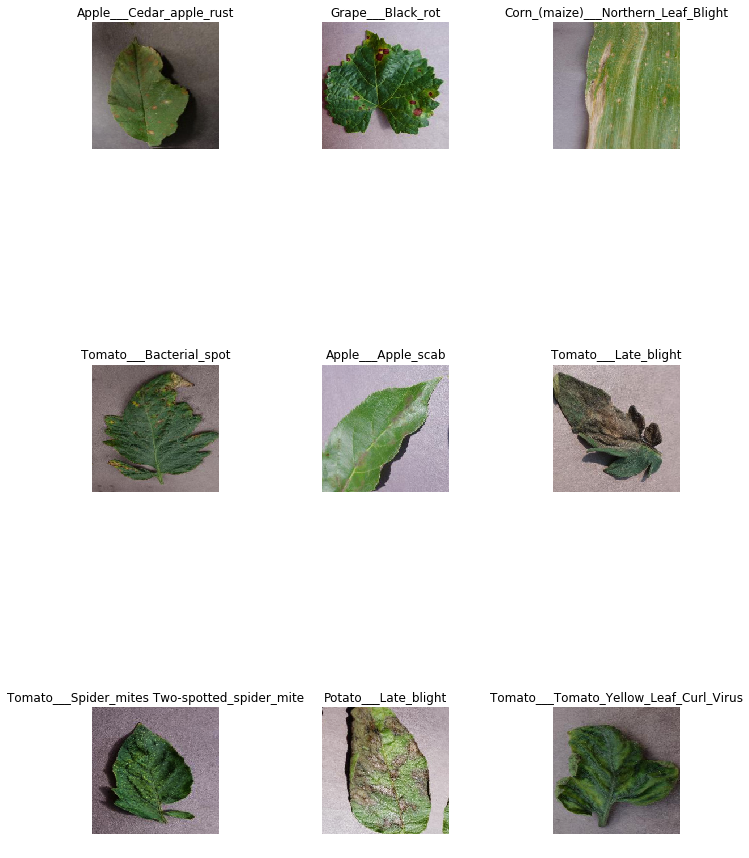

In [0]:
data.show_batch(rows = 3, figsize = (10, 15))

In [0]:
data.classes 

['Apple___Apple_scab',
 'Apple___Black_rot',
 'Apple___Cedar_apple_rust',
 'Apple___healthy',
 'Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot',
 'Corn_(maize)___Common_rust_',
 'Corn_(maize)___Northern_Leaf_Blight',
 'Corn_(maize)___healthy',
 'Grape___Black_rot',
 'Grape___Esca_(Black_Measles)',
 'Grape___Leaf_blight_(Isariopsis_Leaf_Spot)',
 'Grape___healthy',
 'Potato___Early_blight',
 'Potato___Late_blight',
 'Potato___healthy',
 'Tomato___Bacterial_spot',
 'Tomato___Early_blight',
 'Tomato___Late_blight',
 'Tomato___Leaf_Mold',
 'Tomato___Septoria_leaf_spot',
 'Tomato___Spider_mites Two-spotted_spider_mite',
 'Tomato___Target_Spot',
 'Tomato___Tomato_Yellow_Leaf_Curl_Virus',
 'Tomato___Tomato_mosaic_virus',
 'Tomato___healthy']

In [0]:
#Creating convolutional neural network learner
learn = cnn_learner(data, models.resnet34, metrics = error_rate)

In [0]:
#Now training a model, first with 'freeze', means using pretrained weights of 'Imagenet' 
#and then with 'unfreeze', means training all the layers

#By default, fastai train a model with 'freeze'
#for 'unfreezing' a model, you have to explicit call unfreeze()

In [0]:
learn.fit_one_cycle(2)

epoch,train_loss,valid_loss,error_rate,time
0,0.268345,0.170590,0.068000,1:09:22
1,0.141257,0.099852,0.044000,04:36


In [0]:
learn.fit_one_cycle(2)

epoch,train_loss,valid_loss,error_rate,time
0,0.167864,0.095309,0.044000,04:33
1,0.099412,0.069489,0.024000,04:32


In [0]:
learn.save('s1-e4-res34')

In [0]:
learn.fit_one_cycle(1)

epoch,train_loss,valid_loss,error_rate,time
0,0.083618,0.061542,0.020000,04:37


In [0]:
learn.save('s2-e5-res34')

In [0]:
learn.fit_one_cycle(1)

epoch,train_loss,valid_loss,error_rate,time
0,0.079111,0.070409,0.024000,04:39


In [0]:
learn.load('s2-e5-res34')

In [0]:
#Creating a Interpretation object, this object helps us in various analysis.
interp = ClassificationInterpretation.from_learner(learn)

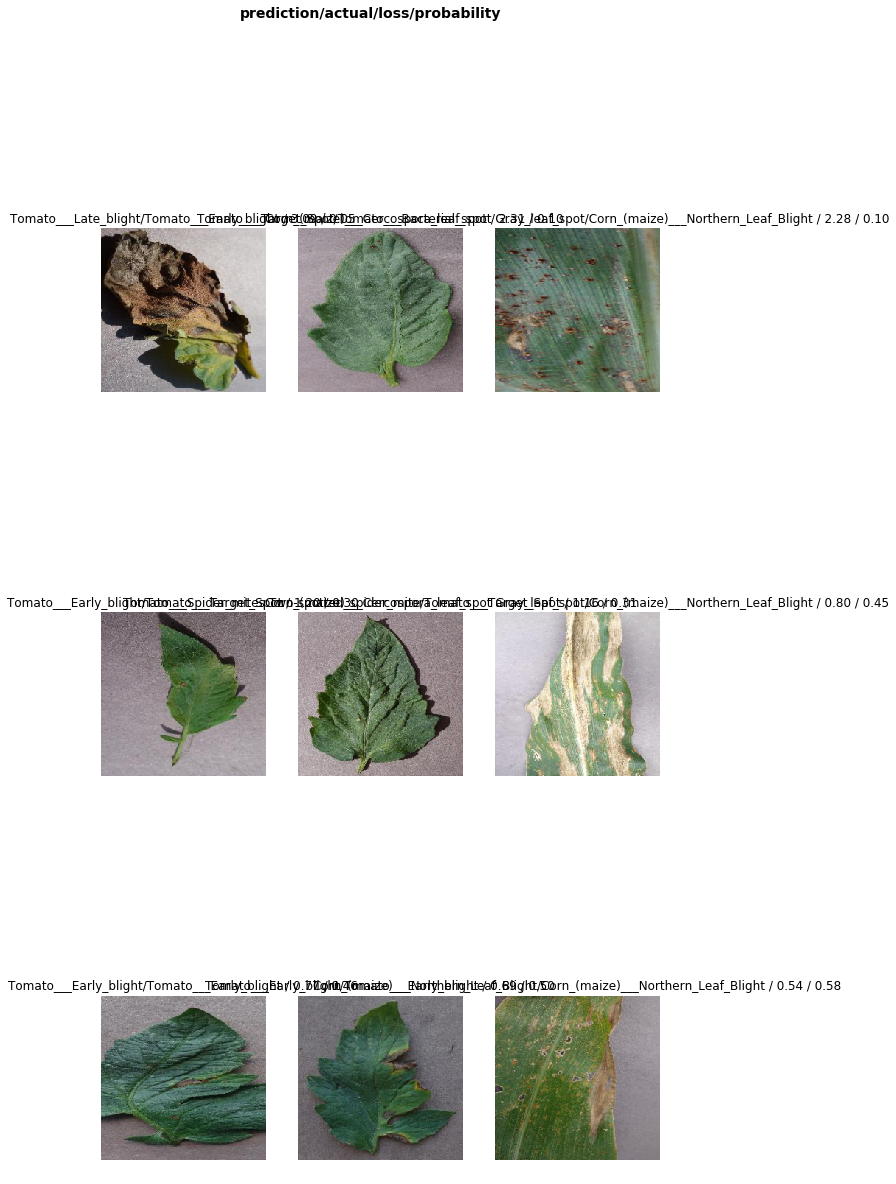

In [0]:
#Shows samples with highest error, or which our model faces most difficulty in classifying this samples
interp.plot_top_losses(9, figsize = (10, 20), heatmap = False)

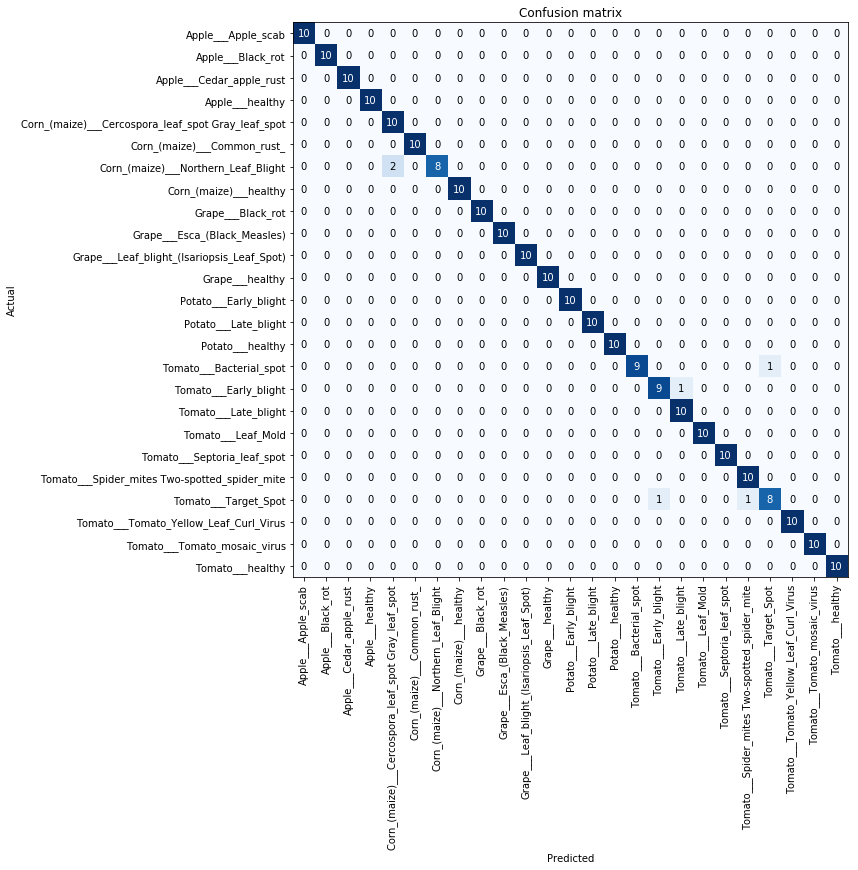

In [0]:
interp.plot_confusion_matrix(figsize = (12, 12))

In [0]:
#Shows samples which our model get most confused with
interp.most_confused()

[('Corn_(maize)___Northern_Leaf_Blight',
  'Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot',
  2),
 ('Tomato___Bacterial_spot', 'Tomato___Target_Spot', 1),
 ('Tomato___Early_blight', 'Tomato___Late_blight', 1),
 ('Tomato___Target_Spot', 'Tomato___Early_blight', 1),
 ('Tomato___Target_Spot', 'Tomato___Spider_mites Two-spotted_spider_mite', 1)]

In [0]:
#This helps us in finding a good learning rate 
learn.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


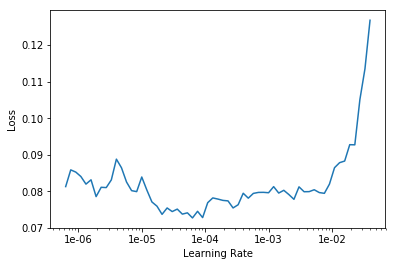

In [0]:
learn.recorder.plot()

In [0]:
#Now, its time to unfreeze the model
learn.unfreeze()
learn.fit_one_cycle(1)

epoch,train_loss,valid_loss,error_rate,time
0,0.057945,0.052945,0.016000,04:52


In [0]:
learn.unfreeze()
learn.fit_one_cycle(2, max_lr = slice(1e-6, 1e-5))

epoch,train_loss,valid_loss,error_rate,time
0,0.036563,0.040529,0.016000,04:47
1,0.037674,0.037979,0.020000,04:49


In [0]:
learn.unfreeze()
learn.fit_one_cycle(1, max_lr = slice(1e-6, 1e-5))

In [0]:
learn.save('s3-unfr-e1-res34')

In [0]:
learn.fit_one_cycle(1, max_lr = slice(1e-6, 1e-5))

epoch,train_loss,valid_loss,error_rate,time
0,0.032006,0.029262,0.016000,04:48


In [0]:
learn.fit_one_cycle(1, max_lr = slice(1e-6, 1e-5))

epoch,train_loss,valid_loss,error_rate,time
0,0.032116,0.027186,0.012000,04:48


In [0]:
learn.save('s4-unfr-e3-res34')

In [0]:
learn.fit_one_cycle(1, max_lr = slice(1e-6, 1e-5))

epoch,train_loss,valid_loss,error_rate,time
0,0.028521,0.025891,0.012000,04:46


In [0]:
learn.save('s5-unfr-e4-res34')

In [0]:
learn.load('s5-unfr-e4-res34')

In [0]:
learn.fit_one_cycle(1, max_lr = slice(1e-6, 1e-5))

epoch,train_loss,valid_loss,error_rate,time
0,0.024782,0.022181,0.012000,04:32


In [0]:
learn.save('s6-unfr-e5-res34')

In [0]:
learn.fit_one_cycle(1, max_lr = slice(1e-6, 1e-5))

epoch,train_loss,valid_loss,error_rate,time
0,0.026909,0.023153,0.012000,04:35


In [0]:
# Getting 99% accuracy.....hurrah!!!